In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
https://insights.stackoverflow.com/survey

In [2]:
results_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv", index_col='ResponseId')
schema_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_schema.csv", index_col='qname')

In [3]:
# for _ in schema_df.index:
#     print(_ , schema_df.loc[_, 'question'])

In [4]:
# check the question corresponding to the column name
# survey_results_schema & survey_results_public has some different question name
schema_df.loc['TimeSearching', 'question']

'On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work? (This includes time spent searching on your own, asking a colleague, and waiting for a response).'

## Productivity impacts

### Participation in Professional Developer series
https://survey.stackoverflow.co/2023/#participation-in-professional-developer-series

<Axes: >

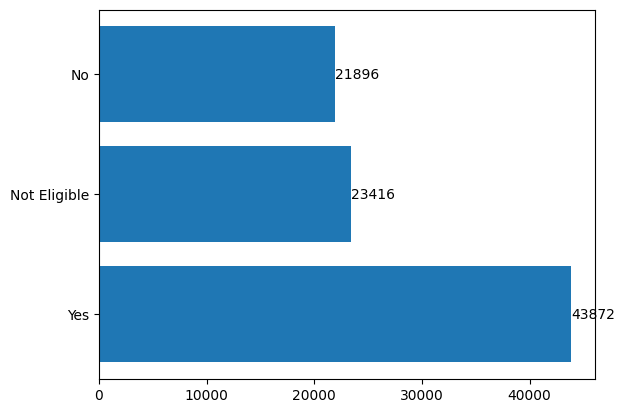

In [5]:
pro_dev_series = results_df['TBranch'].fillna('Not Eligible').value_counts(dropna=False)

fig, ax = plt.subplots()

bars = ax.barh(pro_dev_series.index, pro_dev_series.values)
ax.bar_label(bars)
ax

### Individual contributor or people manager 
https://survey.stackoverflow.co/2023/#individual-contributor-or-people-manager

<Axes: >

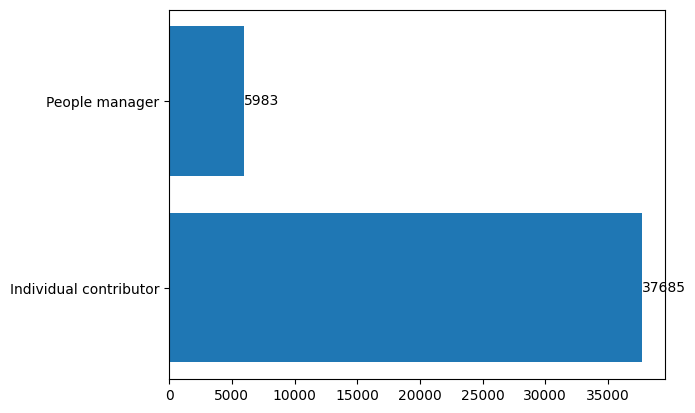

In [6]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['ICorPM'].value_counts().index, results_df['ICorPM'].value_counts().values)
ax.bar_label(bars)
ax

### Years of professional work experience

#### All Respondents
https://survey.stackoverflow.co/2023/#productivity-impacts-work-exp

In [7]:
work_pro_df = results_df['WorkExp'].dropna().value_counts()
work_pro_df = pd.DataFrame({'Years': work_pro_df.index, 'Counts': work_pro_df.values})
# work_pro_df.replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace =True)
work_pro_df.set_index('Years', inplace=True)

In [8]:
exp_grp_dict = {
                'years_1_to_4' : 0,
                'years_5_to_9' : 0,
                'years_10_to_14' : 0,
                'years_15_to_19' : 0,
                'years_20_to_24' : 0,
                'years_25_to_29' : 0,
                'years_30_to_34' : 0,
                'years_35_to_39' : 0,
                'years_40_to_44' : 0,
                'years_45_to_49' : 0,
                'Less_than_1_year' : 0,
                'More_than_50_years' : 0
                }

for _ in work_pro_df.index:
    val = int(_)
    # counts for a exp
    counts = work_pro_df.loc[_, 'Counts']

    # check which age fall into which exp group
    # update the variable for each ages in group
    if val in range(1,5):
        exp_grp_dict['years_1_to_4'] += counts
    elif val in range(5,10):
        exp_grp_dict['years_5_to_9'] += counts
    elif val in range(10,15):
        exp_grp_dict['years_10_to_14'] += counts
    elif val in range(15,20):
        exp_grp_dict['years_15_to_19'] += counts
    elif val in range(20,25):
        exp_grp_dict['years_20_to_24'] += counts
    elif val in range(25,30):
        exp_grp_dict['years_25_to_29'] += counts
    elif val in range(30,35):
        exp_grp_dict['years_30_to_34'] += counts
    elif val in range(35,40):
        exp_grp_dict['years_35_to_39'] += counts
    elif val in range(40,45):
        exp_grp_dict['years_40_to_44'] += counts
    elif val in range(45,50):
        exp_grp_dict['years_45_to_49'] += counts
    elif val >= 50:
        exp_grp_dict['More_than_50_years'] += counts
    elif val == 0:
        exp_grp_dict['Less_than_1_year'] +=counts

exp_years_grp = [item for item in exp_grp_dict.keys()]
exp_counts = [item for item in exp_grp_dict.values()]

<Axes: >

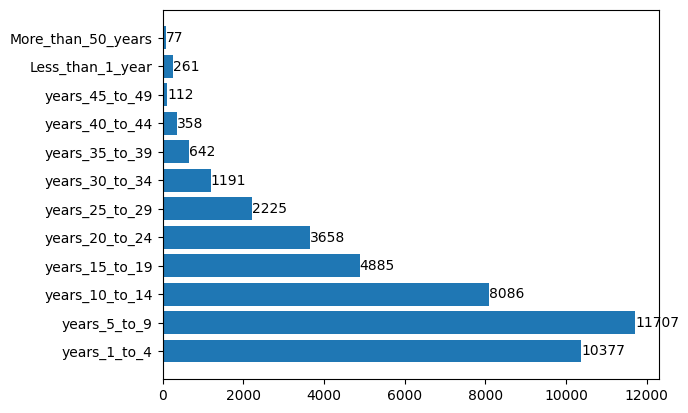

In [9]:
fig, ax = plt.subplots()

bars = ax.barh(exp_years_grp, exp_counts)
ax.bar_label(bars)
ax

#### Individual Contributor
https://survey.stackoverflow.co/2023/#productivity-impacts-work-exp-ic

In [10]:
# new dataframe of Individual contributor
ind_contib_df = results_df[results_df['ICorPM'] == 'Individual contributor'][['WorkExp']]

ind_contib_counts_df = ind_contib_df['WorkExp'].dropna().value_counts()
ind_contib_counts_df = pd.DataFrame({'Years': ind_contib_counts_df.index, 'Counts': ind_contib_counts_df.values})
ind_contib_counts_df.set_index('Years', inplace=True)

In [11]:
ind_contib_age = {
                'years_1_to_4' : 0,
                'years_5_to_9' : 0,
                'years_10_to_14' : 0,
                'years_15_to_19' : 0,
                'years_20_to_24' : 0,
                'years_25_to_29' : 0,
                'years_30_to_34' : 0,
                'years_35_to_39' : 0,
                'years_40_to_44' : 0,
                'years_45_to_49' : 0,
                'Less_than_1_year' : 0,
                'More_than_50_years' : 0
                }

for _ in ind_contib_counts_df.index:
    val = int(_)
    # counts for a exp
    counts = ind_contib_counts_df.loc[_, 'Counts']

    # check which age fall into which age group
    # update the variable for each ages in group
    if val in range(1,5):
        ind_contib_age['years_1_to_4'] += counts
    elif val in range(5,10):
        ind_contib_age['years_5_to_9'] += counts
    elif val in range(10,15):
        ind_contib_age['years_10_to_14'] += counts
    elif val in range(15,20):
        ind_contib_age['years_15_to_19'] += counts
    elif val in range(20,25):
        ind_contib_age['years_20_to_24'] += counts
    elif val in range(25,30):
        ind_contib_age['years_25_to_29'] += counts
    elif val in range(30,35):
        ind_contib_age['years_30_to_34'] += counts
    elif val in range(35,40):
        ind_contib_age['years_35_to_39'] += counts
    elif val in range(40,45):
        ind_contib_age['years_40_to_44'] += counts
    elif val in range(45,50):
        ind_contib_age['years_45_to_49'] += counts
    elif val >= 50:
        ind_contib_age['More_than_50_years'] += counts
    elif val == 0:
        ind_contib_age['Less_than_1_year'] +=counts

ind_years_grp = [item for item in ind_contib_age.keys()]
ind_counts = [item for item in ind_contib_age.values()]

<Axes: >

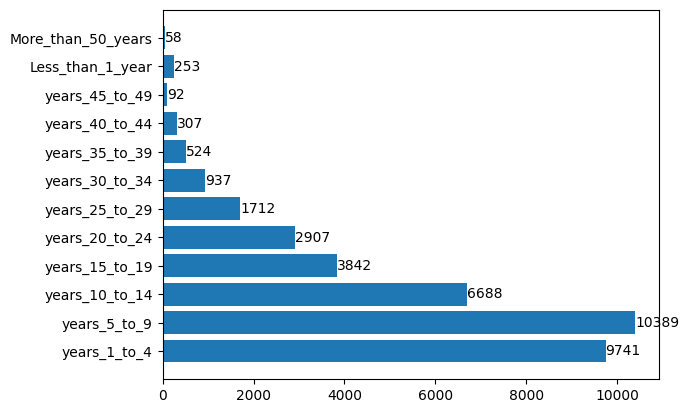

In [12]:
fig, ax = plt.subplots()

bars = ax.barh(ind_years_grp, ind_counts)
ax.bar_label(bars)
ax

#### People Manager
https://survey.stackoverflow.co/2023/#productivity-impacts-work-exp-pm

In [13]:
# new dataframe of Manager
manager_df = results_df[results_df['ICorPM'] == 'People manager'][['WorkExp']]

manager_df = manager_df['WorkExp'].dropna().value_counts()
manager_df = pd.DataFrame({'Years': manager_df.index, 'Counts': manager_df.values})
manager_df.set_index('Years', inplace=True)

In [14]:
manager_age_grp = {
                'years_1_to_4' : 0,
                'years_5_to_9' : 0,
                'years_10_to_14' : 0,
                'years_15_to_19' : 0,
                'years_20_to_24' : 0,
                'years_25_to_29' : 0,
                'years_30_to_34' : 0,
                'years_35_to_39' : 0,
                'years_40_to_44' : 0,
                'years_45_to_49' : 0,
                'Less_than_1_year' : 0,
                'More_than_50_years' : 0
                }

for _ in manager_df.index:
    val = int(_)
    # counts for a exp
    counts = manager_df.loc[_, 'Counts']

    # check which age fall into which age group
    # update the variable for each ages in group
    if val in range(1,5):
        manager_age_grp['years_1_to_4'] += counts
    elif val in range(5,10):
        manager_age_grp['years_5_to_9'] += counts
    elif val in range(10,15):
        manager_age_grp['years_10_to_14'] += counts
    elif val in range(15,20):
        manager_age_grp['years_15_to_19'] += counts
    elif val in range(20,25):
        manager_age_grp['years_20_to_24'] += counts
    elif val in range(25,30):
        manager_age_grp['years_25_to_29'] += counts
    elif val in range(30,35):
        manager_age_grp['years_30_to_34'] += counts
    elif val in range(35,40):
        manager_age_grp['years_35_to_39'] += counts
    elif val in range(40,45):
        manager_age_grp['years_40_to_44'] += counts
    elif val in range(45,50):
        manager_age_grp['years_45_to_49'] += counts
    elif val >= 50:
        manager_age_grp['More_than_50_years'] += counts
    elif val == 0:
        manager_age_grp['Less_than_1_year'] +=counts

manager_years_grp = [item for item in manager_age_grp.keys()]
manager_age_counts = [item for item in manager_age_grp.values()]

<Axes: >

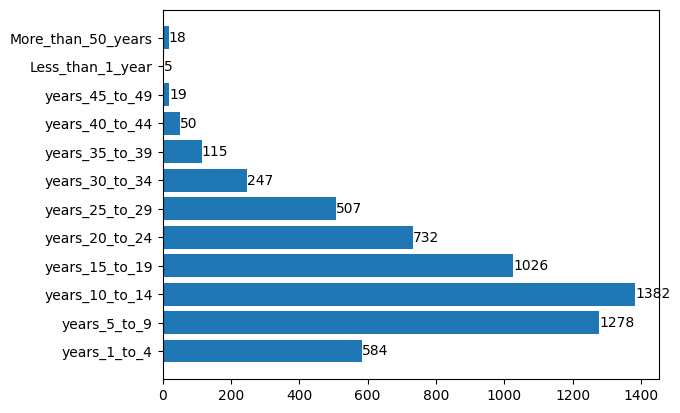

In [15]:
fig, ax = plt.subplots()

bars = ax.barh(manager_years_grp, manager_age_counts)
ax.bar_label(bars)
ax

### Industry

#### All Respondents 
https://survey.stackoverflow.co/2023/#productivity-impacts-industry

<Axes: >

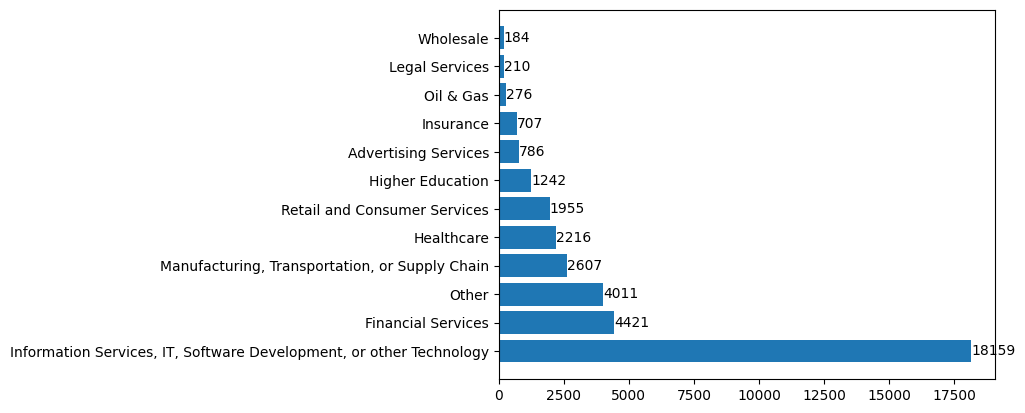

In [16]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['Industry'].value_counts().index, results_df['Industry'].value_counts().values)
ax.bar_label(bars)
ax

#### Individual Contributor
https://survey.stackoverflow.co/2023/#productivity-impacts-industry-ic

<Axes: >

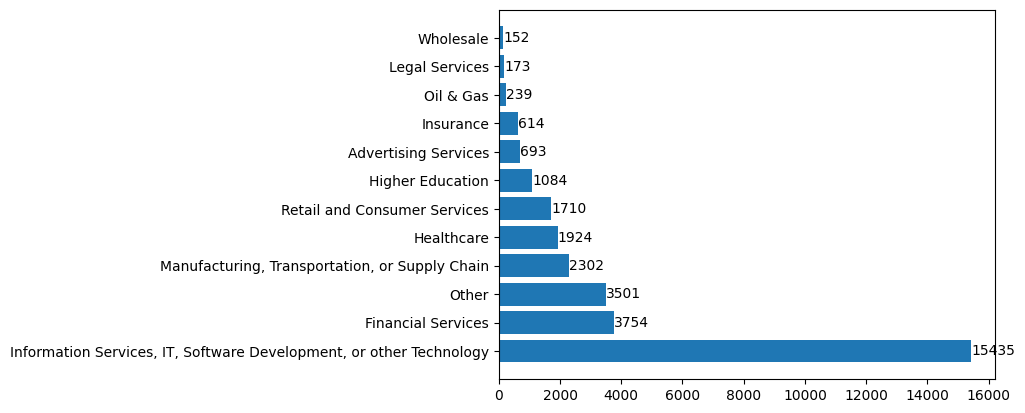

In [17]:
# new dataframe of Individual contributor
indi_industry_df = results_df[results_df['ICorPM'] == 'Individual contributor']['Industry']

fig, ax = plt.subplots()

bars = ax.barh(indi_industry_df.value_counts().index, indi_industry_df.value_counts().values)
ax.bar_label(bars)
ax

#### People Manager
https://survey.stackoverflow.co/2023/#productivity-impacts-industry-pm

<Axes: >

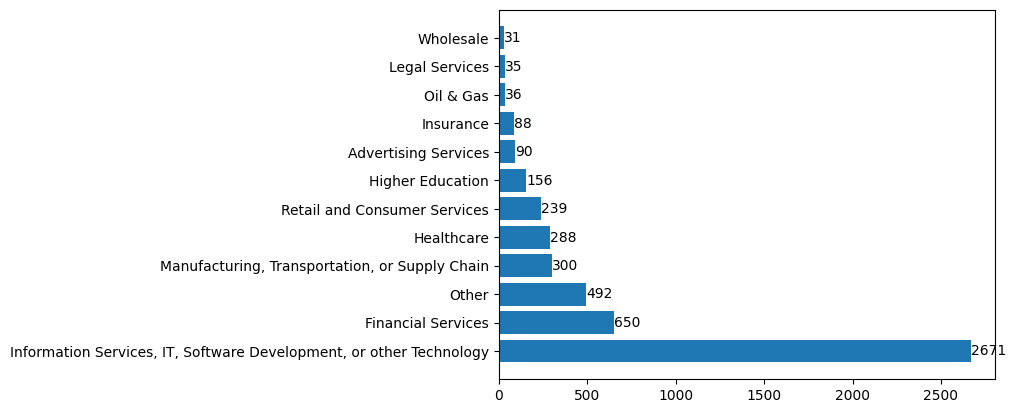

In [18]:
# new dataframe of Individual contributor
manager_df = results_df[results_df['ICorPM'] == 'People manager']['Industry']

fig, ax = plt.subplots()

bars = ax.barh(manager_df.value_counts().index, manager_df.value_counts().values)
ax.bar_label(bars)
ax

### Ability to find knowledge and information within their organization

#### All Respondents
https://survey.stackoverflow.co/2023/#productivity-impacts-knowledge

In [19]:
# Knowledge_1 to Knowledge_8
knowledge_range = range(1,9)

# columns for new dataframe 
columns = np.array(results_df['Knowledge_1'].dropna().unique())

# create a question list
# find the question from schema df
knowledge_list = []
for num in knowledge_range:
    qname = f'Knowledge_{num}'
    question = schema_df.loc[qname, 'question']
    knowledge_list.append(question)

# create a new dataframe
# set questions as index
info_df = pd.DataFrame(index=knowledge_list, columns=columns)

In [20]:
for num, question in enumerate(knowledge_list, start=1):
    qname = f'Knowledge_{num}'

    # counts for qname of all 5 columns
    counts_df = results_df[qname].value_counts(normalize=True)

    # select one value, formatted, added to dataframe
    for idx in counts_df.index:
        count = counts_df[idx]
        info_df.loc[question, idx] = f'{count*100 : .2f} %'

info_df

,Strongly agree,Agree,Disagree,Strongly disagree,Neither agree nor disagree
I have interactions with people outside of my immediate team.,36.45 %,46.58 %,6.12 %,2.41 %,8.45 %
"Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn't shared with others)",12.53 %,32.31 %,22.04 %,7.59 %,25.52 %
I can find up-to-date information within my organization to help me do my job.,9.70 %,40.35 %,18.63 %,4.77 %,26.55 %
I am able to quickly find answers to my questions with existing tools and resources.,11.41 %,45.53 %,14.46 %,2.89 %,25.71 %
I know which system or resource to use to find information and answers to questions I have.,17.42 %,53.29 %,9.16 %,1.87 %,18.25 %
I often find myself answering questions that I’ve already answered before.,12.35 %,36.54 %,20.66 %,3.11 %,27.34 %
Waiting on answers to questions often causes interruptions and disrupts my workflow.,15.68 %,37.76 %,18.91 %,3.68 %,23.97 %
I feel like I have the tools and/or resources to quickly understand and work on any area of my company's code/system/platform.,11.12 %,39.68 %,16.92 %,5.80 %,26.47 %


#### Individual Contributor
https://survey.stackoverflow.co/2023/#productivity-impacts-knowledge-ic

In [21]:
# create a dataframe of Individual contributor
indi_df = results_df[results_df['ICorPM'] == 'Individual contributor']

# apply all logic from all respondent code block
# overwrite the all respondent info_df too
for num, question in enumerate(knowledge_list, start=1):
    qname = f'Knowledge_{num}'

    # counts for qname of all 5 columns
    counts_df = indi_df[qname].value_counts(normalize=True)

    # select one value, formatted, added to dataframe
    for idx in counts_df.index:
        count = counts_df[idx]
        info_df.loc[question, idx] = f'{count*100 : .2f} %'

info_df

,Strongly agree,Agree,Disagree,Strongly disagree,Neither agree nor disagree
I have interactions with people outside of my immediate team.,33.22 %,48.27 %,6.84 %,2.50 %,9.17 %
"Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn't shared with others)",12.39 %,32.24 %,22.04 %,7.35 %,25.98 %
I can find up-to-date information within my organization to help me do my job.,9.21 %,40.24 %,18.92 %,4.92 %,26.72 %
I am able to quickly find answers to my questions with existing tools and resources.,11.10 %,45.27 %,14.66 %,3.00 %,25.97 %
I know which system or resource to use to find information and answers to questions I have.,16.68 %,53.26 %,9.50 %,1.95 %,18.61 %
I often find myself answering questions that I’ve already answered before.,11.76 %,35.90 %,21.38 %,3.25 %,27.72 %
Waiting on answers to questions often causes interruptions and disrupts my workflow.,15.78 %,38.01 %,18.74 %,3.64 %,23.84 %
I feel like I have the tools and/or resources to quickly understand and work on any area of my company's code/system/platform.,10.37 %,39.28 %,17.43 %,6.07 %,26.85 %


#### People Manager
https://survey.stackoverflow.co/2023/#productivity-impacts-knowledge-pm

In [22]:
# create a dataframe of People manager
people_df = results_df[results_df['ICorPM'] == 'People manager']

# apply all logic from all respondent code block
# overwrite the all respondent info_df too
for num, question in enumerate(knowledge_list, start=1):
    qname = f'Knowledge_{num}'

    # counts for qname of all 5 columns
    counts_df = people_df[qname].value_counts(normalize=True)

    # select one value, formatted, added to dataframe
    for idx in counts_df.index:
        count = counts_df[idx]
        info_df.loc[question, idx] = f'{count*100 : .2f} %'

info_df

,Strongly agree,Agree,Disagree,Strongly disagree,Neither agree nor disagree
I have interactions with people outside of my immediate team.,57.02 %,35.80 %,1.56 %,1.80 %,3.83 %
"Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn't shared with others)",13.35 %,32.92 %,21.99 %,9.09 %,22.64 %
I can find up-to-date information within my organization to help me do my job.,12.85 %,40.94 %,16.82 %,3.90 %,25.50 %
I am able to quickly find answers to my questions with existing tools and resources.,13.37 %,47.04 %,13.29 %,2.27 %,24.03 %
I know which system or resource to use to find information and answers to questions I have.,22.10 %,53.44 %,7.08 %,1.38 %,16.00 %
I often find myself answering questions that I’ve already answered before.,16.10 %,40.62 %,16.09 %,2.24 %,24.95 %
Waiting on answers to questions often causes interruptions and disrupts my workflow.,15.10 %,36.19 %,20.01 %,3.91 %,24.79 %
I feel like I have the tools and/or resources to quickly understand and work on any area of my company's code/system/platform.,15.88 %,42.22 %,13.72 %,4.16 %,24.00 %


### Frequency of productivity frictions

#### All Respondents
https://survey.stackoverflow.co/2023/#productivity-impacts-frequency

In [23]:
# Knowledge_1 to Knowledge_8
freq_range = range(1,4)

# columns for new dataframe 
columns = np.array(results_df['Frequency_1'].dropna().unique())

# create a question list
# find the question from schema df
freq_list = []
for num in freq_range:
    qname = f'Frequency_{num}'
    question = schema_df.loc[qname, 'question']
    freq_list.append(question)

# create a new dataframe
# set questions as index
info_df = pd.DataFrame(index=freq_list, columns=columns)

In [24]:
for num, question in enumerate(freq_list, start=1):
    qname = f'Frequency_{num}'

    # counts for qname of all 5 columns
    counts_df = results_df[qname].value_counts(normalize=True)

    # select one value, formatted, added to dataframe
    for idx in counts_df.index:
        count = counts_df[idx]
        info_df.loc[question, idx] = f'{count*100 : .2f} %'

info_df

,1-2 times a week,6-10 times a week,Never,3-5 times a week,10+ times a week
Needing help from people outside of your immediate team?,60.90 %,2.02 %,25.54 %,9.78 %,1.75 %
Interacting with people outside of your immediate team?,45.15 %,10.45 %,9.56 %,23.40 %,11.43 %
Encountering knowledge silos (where one individual or team has information that's not shared or distributed with other individuals or teams) at work?,52.30 %,3.12 %,29.49 %,12.48 %,2.61 %


#### Individual Contributor
https://survey.stackoverflow.co/2023/#productivity-impacts-frequency-ic

In [25]:
# create a dataframe of Individual contributor
indi_df = results_df[results_df['ICorPM'] == 'Individual contributor']

# apply all logic from all respondent code block
# overwrite the all respondent info_df too
for num, question in enumerate(freq_list, start=1):
    qname = f'Frequency_{num}'

    # counts for qname of all 5 columns
    counts_df = indi_df[qname].value_counts(normalize=True)

    # select one value, formatted, added to dataframe
    for idx in counts_df.index:
        count = counts_df[idx]
        info_df.loc[question, idx] = f'{count*100 : .2f} %'

info_df

,1-2 times a week,6-10 times a week,Never,3-5 times a week,10+ times a week
Needing help from people outside of your immediate team?,61.04 %,1.83 %,26.77 %,8.96 %,1.41 %
Interacting with people outside of your immediate team?,47.31 %,9.61 %,10.46 %,23.08 %,9.54 %
Encountering knowledge silos (where one individual or team has information that's not shared or distributed with other individuals or teams) at work?,51.95 %,3.04 %,30.17 %,12.27 %,2.57 %


#### People Manager
https://survey.stackoverflow.co/2023/#productivity-impacts-frequency-pm

In [26]:
# create a dataframe of People manager
people_df = results_df[results_df['ICorPM'] == 'People manager']

# apply all logic from all respondent code block
# overwrite the all respondent info_df too
for num, question in enumerate(freq_list, start=1):
    qname = f'Frequency_{num}'

    # counts for qname of all 5 columns
    counts_df = people_df[qname].value_counts(normalize=True)

    # select one value, formatted, added to dataframe
    for idx in counts_df.index:
        count = counts_df[idx]
        info_df.loc[question, idx] = f'{count*100 : .2f} %'

info_df

,1-2 times a week,6-10 times a week,Never,3-5 times a week,10+ times a week
Needing help from people outside of your immediate team?,60.20 %,3.26 %,17.72 %,14.93 %,3.88 %
Interacting with people outside of your immediate team?,31.59 %,15.80 %,3.84 %,25.44 %,23.32 %
Encountering knowledge silos (where one individual or team has information that's not shared or distributed with other individuals or teams) at work?,54.60 %,3.58 %,25.13 %,13.79 %,2.89 %


### Daily time spent searching for answers/solutions 

#### All Respondents
https://survey.stackoverflow.co/2023/#productivity-impacts-time-searching

<Axes: >

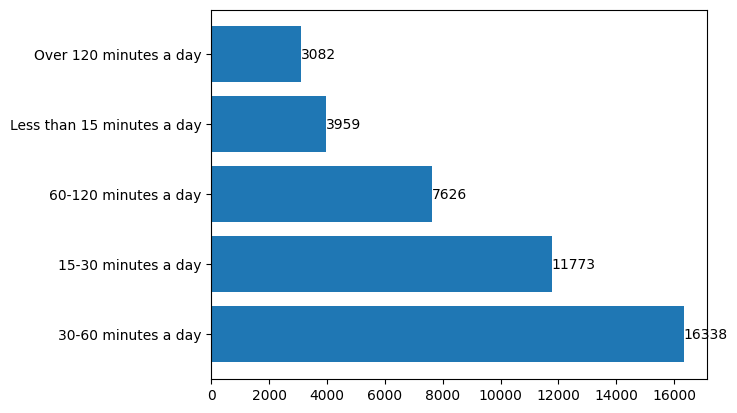

In [27]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['TimeSearching'].value_counts().index, results_df['TimeSearching'].value_counts().values)
ax.bar_label(bars)
ax

#### Individual Contributor
https://survey.stackoverflow.co/2023/#productivity-impacts-time-searching-ic

<Axes: >

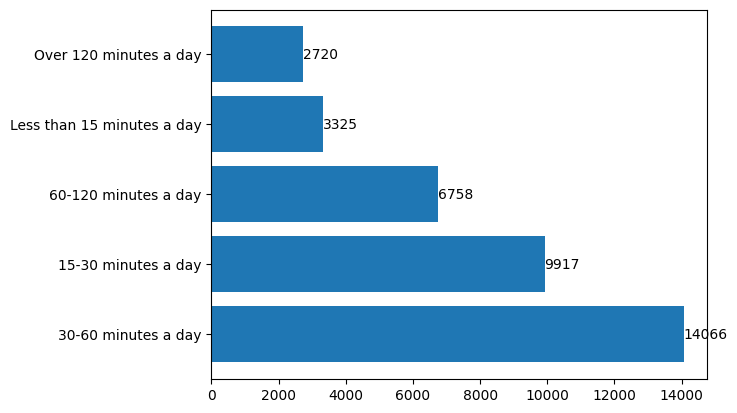

In [28]:
# create a dataframe of Individual contributor
indi_df = results_df[results_df['ICorPM'] == 'Individual contributor']

fig, ax = plt.subplots()

bars = ax.barh(indi_df['TimeSearching'].value_counts().index, indi_df['TimeSearching'].value_counts().values)
ax.bar_label(bars)
ax

#### People Manager
https://survey.stackoverflow.co/2023/#productivity-impacts-time-searching-pm

<Axes: >

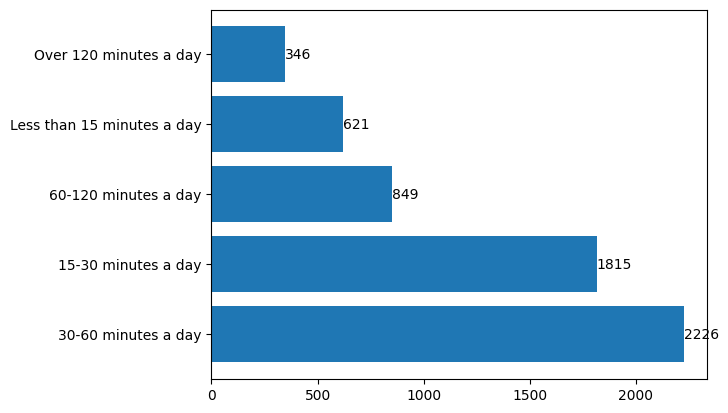

In [29]:
# create a dataframe of People Manager
people_df = results_df[results_df['ICorPM'] == 'People manager']

fig, ax = plt.subplots()

bars = ax.barh(people_df['TimeSearching'].value_counts().index, people_df['TimeSearching'].value_counts().values)
ax.bar_label(bars)
ax

### Daily time spent answering questions

#### All Respondents
https://survey.stackoverflow.co/2023/#productivity-impacts-time-answering

<Axes: >

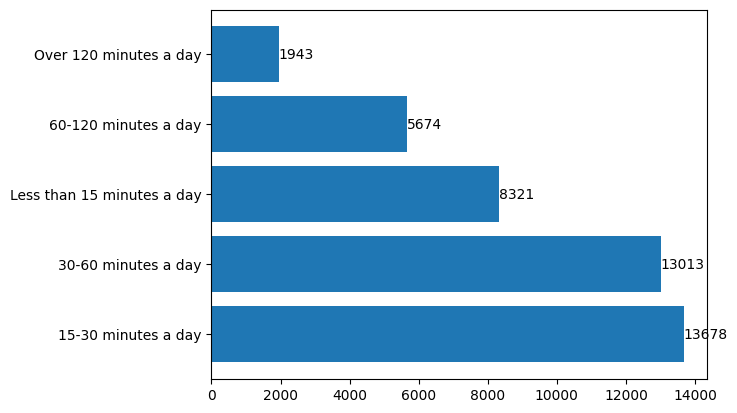

In [30]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['TimeAnswering'].value_counts().index, results_df['TimeAnswering'].value_counts().values)
ax.bar_label(bars)
ax

#### Individual Contributor
https://survey.stackoverflow.co/2023/#productivity-impacts-time-answering-ic

<Axes: >

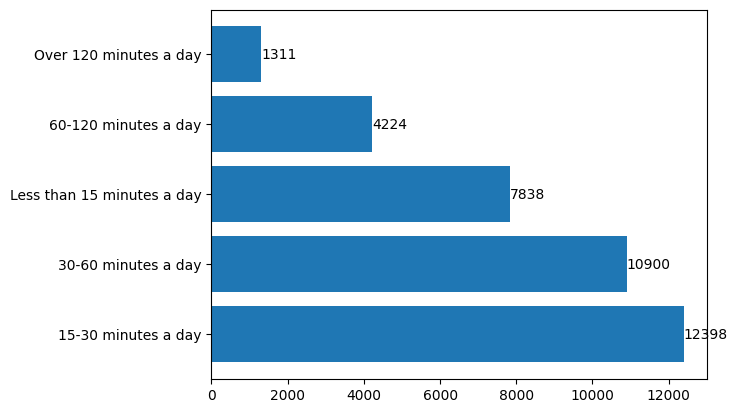

In [31]:
# create a dataframe of Individual Contributor
indi_df = results_df[results_df['ICorPM'] == 'Individual contributor']

fig, ax = plt.subplots()

bars = ax.barh(indi_df['TimeAnswering'].value_counts().index, indi_df['TimeAnswering'].value_counts().values)
ax.bar_label(bars)
ax

#### People Manager
https://survey.stackoverflow.co/2023/#productivity-impacts-time-answering-pm

<Axes: >

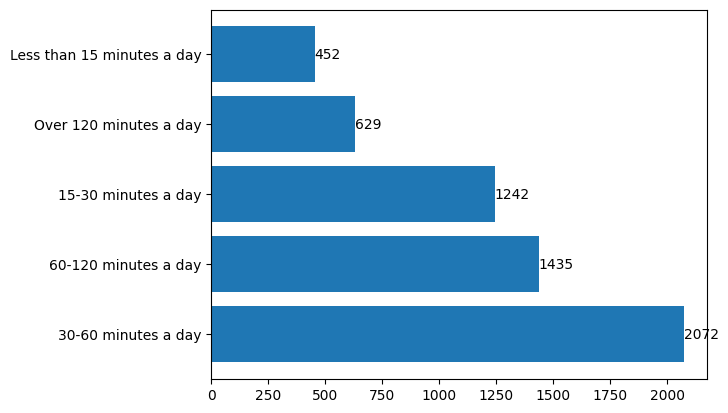

In [32]:
# create a dataframe of People Manager
prople_df = results_df[results_df['ICorPM'] == 'People manager']

fig, ax = plt.subplots()

bars = ax.barh(prople_df['TimeAnswering'].value_counts().index, prople_df['TimeAnswering'].value_counts().values)
ax.bar_label(bars)
ax

## Developer Experience
https://survey.stackoverflow.co/2023/#developer-experience-processes-tools-and-programs-within-an-organization

In [33]:
# create a list of all unique Processes, tools, and programs within an organization 
tools_in_org = []

for tools in results_df['ProfessionalTech'].dropna().unique():
    for tool in tools.split(';'):
        if tool in tools_in_org:
            pass
        else:
            tools_in_org.append(tool)

tools_in_org_counts = []
for tool in tools_in_org:
    count = results_df[results_df['ProfessionalTech'].str.contains(tool, na=False, regex=False)]['ProfessionalTech'].count()
    tools_in_org_counts.append(count)

<Axes: >

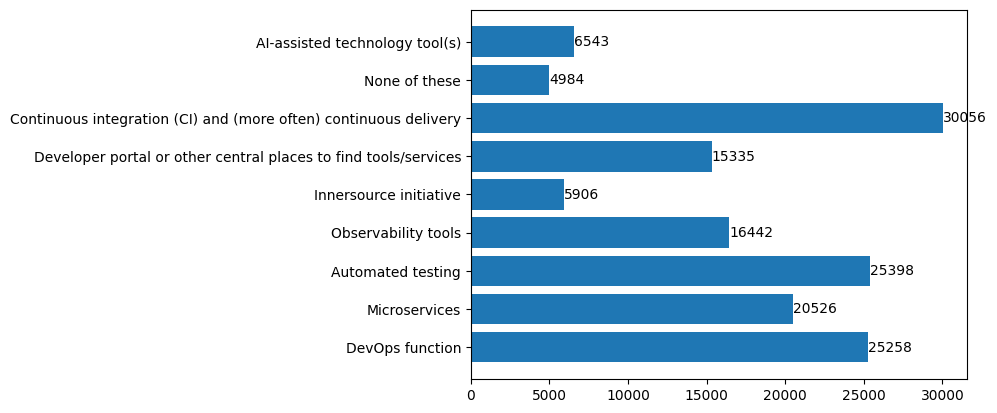

In [34]:
fig, ax = plt.subplots()

bars = ax.barh(tools_in_org, tools_in_org_counts)
ax.bar_label(bars)
ax